In [ ]:
# Librerias para manipulacion de Data y Gráficas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Preparación de datos y configuración de pipeline para Machine Learning con scikit-learn
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

#models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
#for classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#for regression
from sklearn.metrics import r2_score

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek # Estas 3 últimas librerías sirven para generar datos sintéticos

In [ ]:
dataset = pd.read_csv('/content/proyecto.csv')

In [ ]:
#Entender y conocer el dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5910 entries, 0 to 5909
Data columns (total 65 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Utilidad neta sobre activos totales                               5907 non-null   float64
 1   Pasivos totales sobre activos totales                             5907 non-null   float64
 2   Capital de trabajo sobre activos totales                          5907 non-null   float64
 3   Activos corrientes sobre pasivos a corto plazo                    5889 non-null   float64
 4   Días de liquidez                                                  5899 non-null   float64
 5   Utilidades retenidas sobre activos totales                        5907 non-null   float64
 6   EBIT sobre activos totales                                        5907 non-null   float64
 7   Valor contable del patrimonio sob

In [ ]:
# ver los datos faltantes de cada variable
dataset.isnull().sum()

,0
Utilidad neta sobre activos totales,3
Pasivos totales sobre activos totales,3
Capital de trabajo sobre activos totales,3
Activos corrientes sobre pasivos a corto plazo,21
Días de liquidez,11
...,...
Rotación de cuentas por cobrar,15
Días de pasivos a corto plazo,0
Ventas sobre pasivos a corto plazo,21
Ventas sobre activos fijos,107


In [ ]:
# Detectar valores duplicados (consistencia)
dataset.duplicated().sum()

np.int64(60)

In [ ]:
#Eliminar registros con valores nulos (Descarte)
dataset_drop = dataset.dropna()
dataset_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3031 entries, 0 to 5909
Data columns (total 65 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Utilidad neta sobre activos totales                               3031 non-null   float64
 1   Pasivos totales sobre activos totales                             3031 non-null   float64
 2   Capital de trabajo sobre activos totales                          3031 non-null   float64
 3   Activos corrientes sobre pasivos a corto plazo                    3031 non-null   float64
 4   Días de liquidez                                                  3031 non-null   float64
 5   Utilidades retenidas sobre activos totales                        3031 non-null   float64
 6   EBIT sobre activos totales                                        3031 non-null   float64
 7   Valor contable del patrimonio sobre pa

In [ ]:
# codificación de la variable Quiebra de la empresa (Sí/No) con la función encoding
le = LabelEncoder()
dataset['Quiebra'] = le.fit_transform(dataset['Quiebra de la empresa (Sí/No)'])
dataset.tail(15)



,Utilidad neta sobre activos totales,Pasivos totales sobre activos totales,Capital de trabajo sobre activos totales,Activos corrientes sobre pasivos a corto plazo,Días de liquidez,Utilidades retenidas sobre activos totales,EBIT sobre activos totales,Valor contable del patrimonio sobre pasivos totales,Ventas sobre activos totales,Patrimonio sobre activos totales,...,Razón de liquidez ajustada,Costos totales sobre ventas totales,Pasivos a largo plazo sobre patrimonio,Rotación de inventario,Rotación de cuentas por cobrar,Días de pasivos a corto plazo,Ventas sobre pasivos a corto plazo,Ventas sobre activos fijos,Quiebra de la empresa (Sí/No),Quiebra
5895,75.298,53.2060,44.626,1.9166,-201.310,0.000,75.298,87.9470,1.2188,46.794,...,16.091,46.5730,0.000,1.8584,5.4598,145.790,2.5035,18.2180,No,0
5896,784.000,76.5270,-16.543,97.8380,-81.704,-74.621,784.000,30.6730,1.8068,23.473,...,3.341,99.9630,0.000,4.1304,6.1010,154.590,2.3611,7.1908,No,0
5897,52.611,15.6140,33.182,3.1252,81.375,1.315,65.297,5.3449,1.0523,83.454,...,63.042,95.0260,0.000,10.2150,4.5254,52.321,6.9761,2.1272,No,0
5898,34.039,65.0290,12.216,1.7179,-43.801,0.000,34.039,53.7770,1.1620,34.971,...,97.336,60.8860,0.000,9.1074,12.2460,53.450,6.8288,1.6419,No,0
5899,1.663,76.3030,19.953,1.2615,-4.665,0.000,39.000,31.0560,1.8894,23.697,...,7.016,99.7940,0.000,9.0336,2.6185,147.400,2.4762,50.4650,No,0
5900,16.368,10.7680,39.651,4.6822,37.338,39.142,19.108,7.8394,1.0919,84.418,...,1.939,91.5830,0.000,6.7117,8.3240,23.970,15.2270,3.3073,No,0
5901,-17.271,94.4380,-24.373,68.2420,-120.900,-17.916,-23.916,178.0000,1.0345,1.681,...,-10.274,96.6680,10.525,6.1891,6.5422,171.590,2.1271,3.4276,No,0
5902,17.688,26.1550,40.505,2.5487,27.966,81.721,23.741,2.5648,99.7440,67.083,...,26.367,1.2026,0.000,38.6540,14.6340,24.167,15.1030,11.8490,No,0
5903,-78.579,1.2273,-19.673,77.8340,-360.130,-41.586,-71.726,-18.5210,48.7660,-22.732,...,34.568,1.5048,-79.113,1.7845,8.8506,664.310,54.9440,1.5773,Yes,1
5904,1.964,33.3680,66.632,2.9969,-146.700,0.000,1.964,1.9969,2.2297,66.632,...,2.948,14.5410,0.000,8.4519,4.2006,54.623,6.6822,NaN,No,0


In [ ]:
#Imputación de valores faltantes con la media excluyendo Quiebra de la empresa (Sí/No)
dataset_mean = dataset.copy()
dataset_mean = dataset.fillna(dataset.mean(numeric_only=True))
dataset_mean.info()
dataset_mean.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5910 entries, 0 to 5909
Data columns (total 66 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Utilidad neta sobre activos totales                               5910 non-null   float64
 1   Pasivos totales sobre activos totales                             5910 non-null   float64
 2   Capital de trabajo sobre activos totales                          5910 non-null   float64
 3   Activos corrientes sobre pasivos a corto plazo                    5910 non-null   float64
 4   Días de liquidez                                                  5910 non-null   float64
 5   Utilidades retenidas sobre activos totales                        5910 non-null   float64
 6   EBIT sobre activos totales                                        5910 non-null   float64
 7   Valor contable del patrimonio sob

,Utilidad neta sobre activos totales,Pasivos totales sobre activos totales,Capital de trabajo sobre activos totales,Activos corrientes sobre pasivos a corto plazo,Días de liquidez,Utilidades retenidas sobre activos totales,EBIT sobre activos totales,Valor contable del patrimonio sobre pasivos totales,Ventas sobre activos totales,Patrimonio sobre activos totales,...,Razón de liquidez ajustada,Costos totales sobre ventas totales,Pasivos a largo plazo sobre patrimonio,Rotación de inventario,Rotación de cuentas por cobrar,Días de pasivos a corto plazo,Ventas sobre pasivos a corto plazo,Ventas sobre activos fijos,Quiebra de la empresa (Sí/No),Quiebra
0,85.567,60.117,33.319,10.2560,139.340,28.248,10.301,66.3410,1.1324,39.883,...,21.455,88.3110,1.4171,80.9820,2.7538,13.478,27.0820,1.545400,No,0
1,71.455,47.009,31.344,1.6672,46.027,25.528,91.811,71.5390,1.0573,3.363,...,21.247,94.5820,1.0190,86.3110,3.1653,91.824,3.9750,8.612200,No,0
2,7.223,63.304,-97.917,84.5320,-93.360,-1.298,7.223,57.9670,1.6743,36.696,...,19.682,99.5850,0.0000,5.0694,8.2175,138.010,2.6448,3.601500,No,0
3,17.655,64.732,13.691,1.2390,-147.040,0.000,23.469,54.4830,1.2601,35.268,...,5.006,98.1730,16.6680,2.0090,15.8810,165.930,2.1998,4.341500,No,0
4,20.218,19.442,46.752,3.5528,42.665,0.000,2.553,4.1435,2.8297,80.558,...,25.097,91.0390,14.0040,18.1960,11.0470,23.623,15.4510,8.100100,No,0
5,65.755,14.119,25.953,2.8381,24.226,32.854,72.943,6.0671,1.0892,85.664,...,76.759,91.8130,0.0000,4.7479,5.1122,54.823,6.6578,1.568600,No,0
6,14.289,83.883,82.401,10.8230,485.860,-60.681,14.425,10.9210,61.0890,91.612,...,15.598,77.7350,0.0000,4.5950,5.2391,50.119,7.2826,6.632100,No,0
7,1.176,28.491,39.736,2.3947,19.534,27.415,14.371,2.3247,1.0872,66.231,...,17.756,91.9770,0.0000,10.4670,6.8589,60.998,5.9838,5.365700,No,0
8,63.263,52.474,15.615,1.0352,-18.175,39.803,66.335,76.4270,1.0376,40.104,...,15.775,96.3760,20.2970,18.7540,9.4150,60.559,6.0272,4.938700,No,0
9,-36.586,65.181,34.819,1.5342,-15.934,0.000,-36.586,53.4170,6.8715,34.818,...,-10.508,86.8490,0.0000,11.7460,22.3840,34.622,10.5420,70.325167,No,0


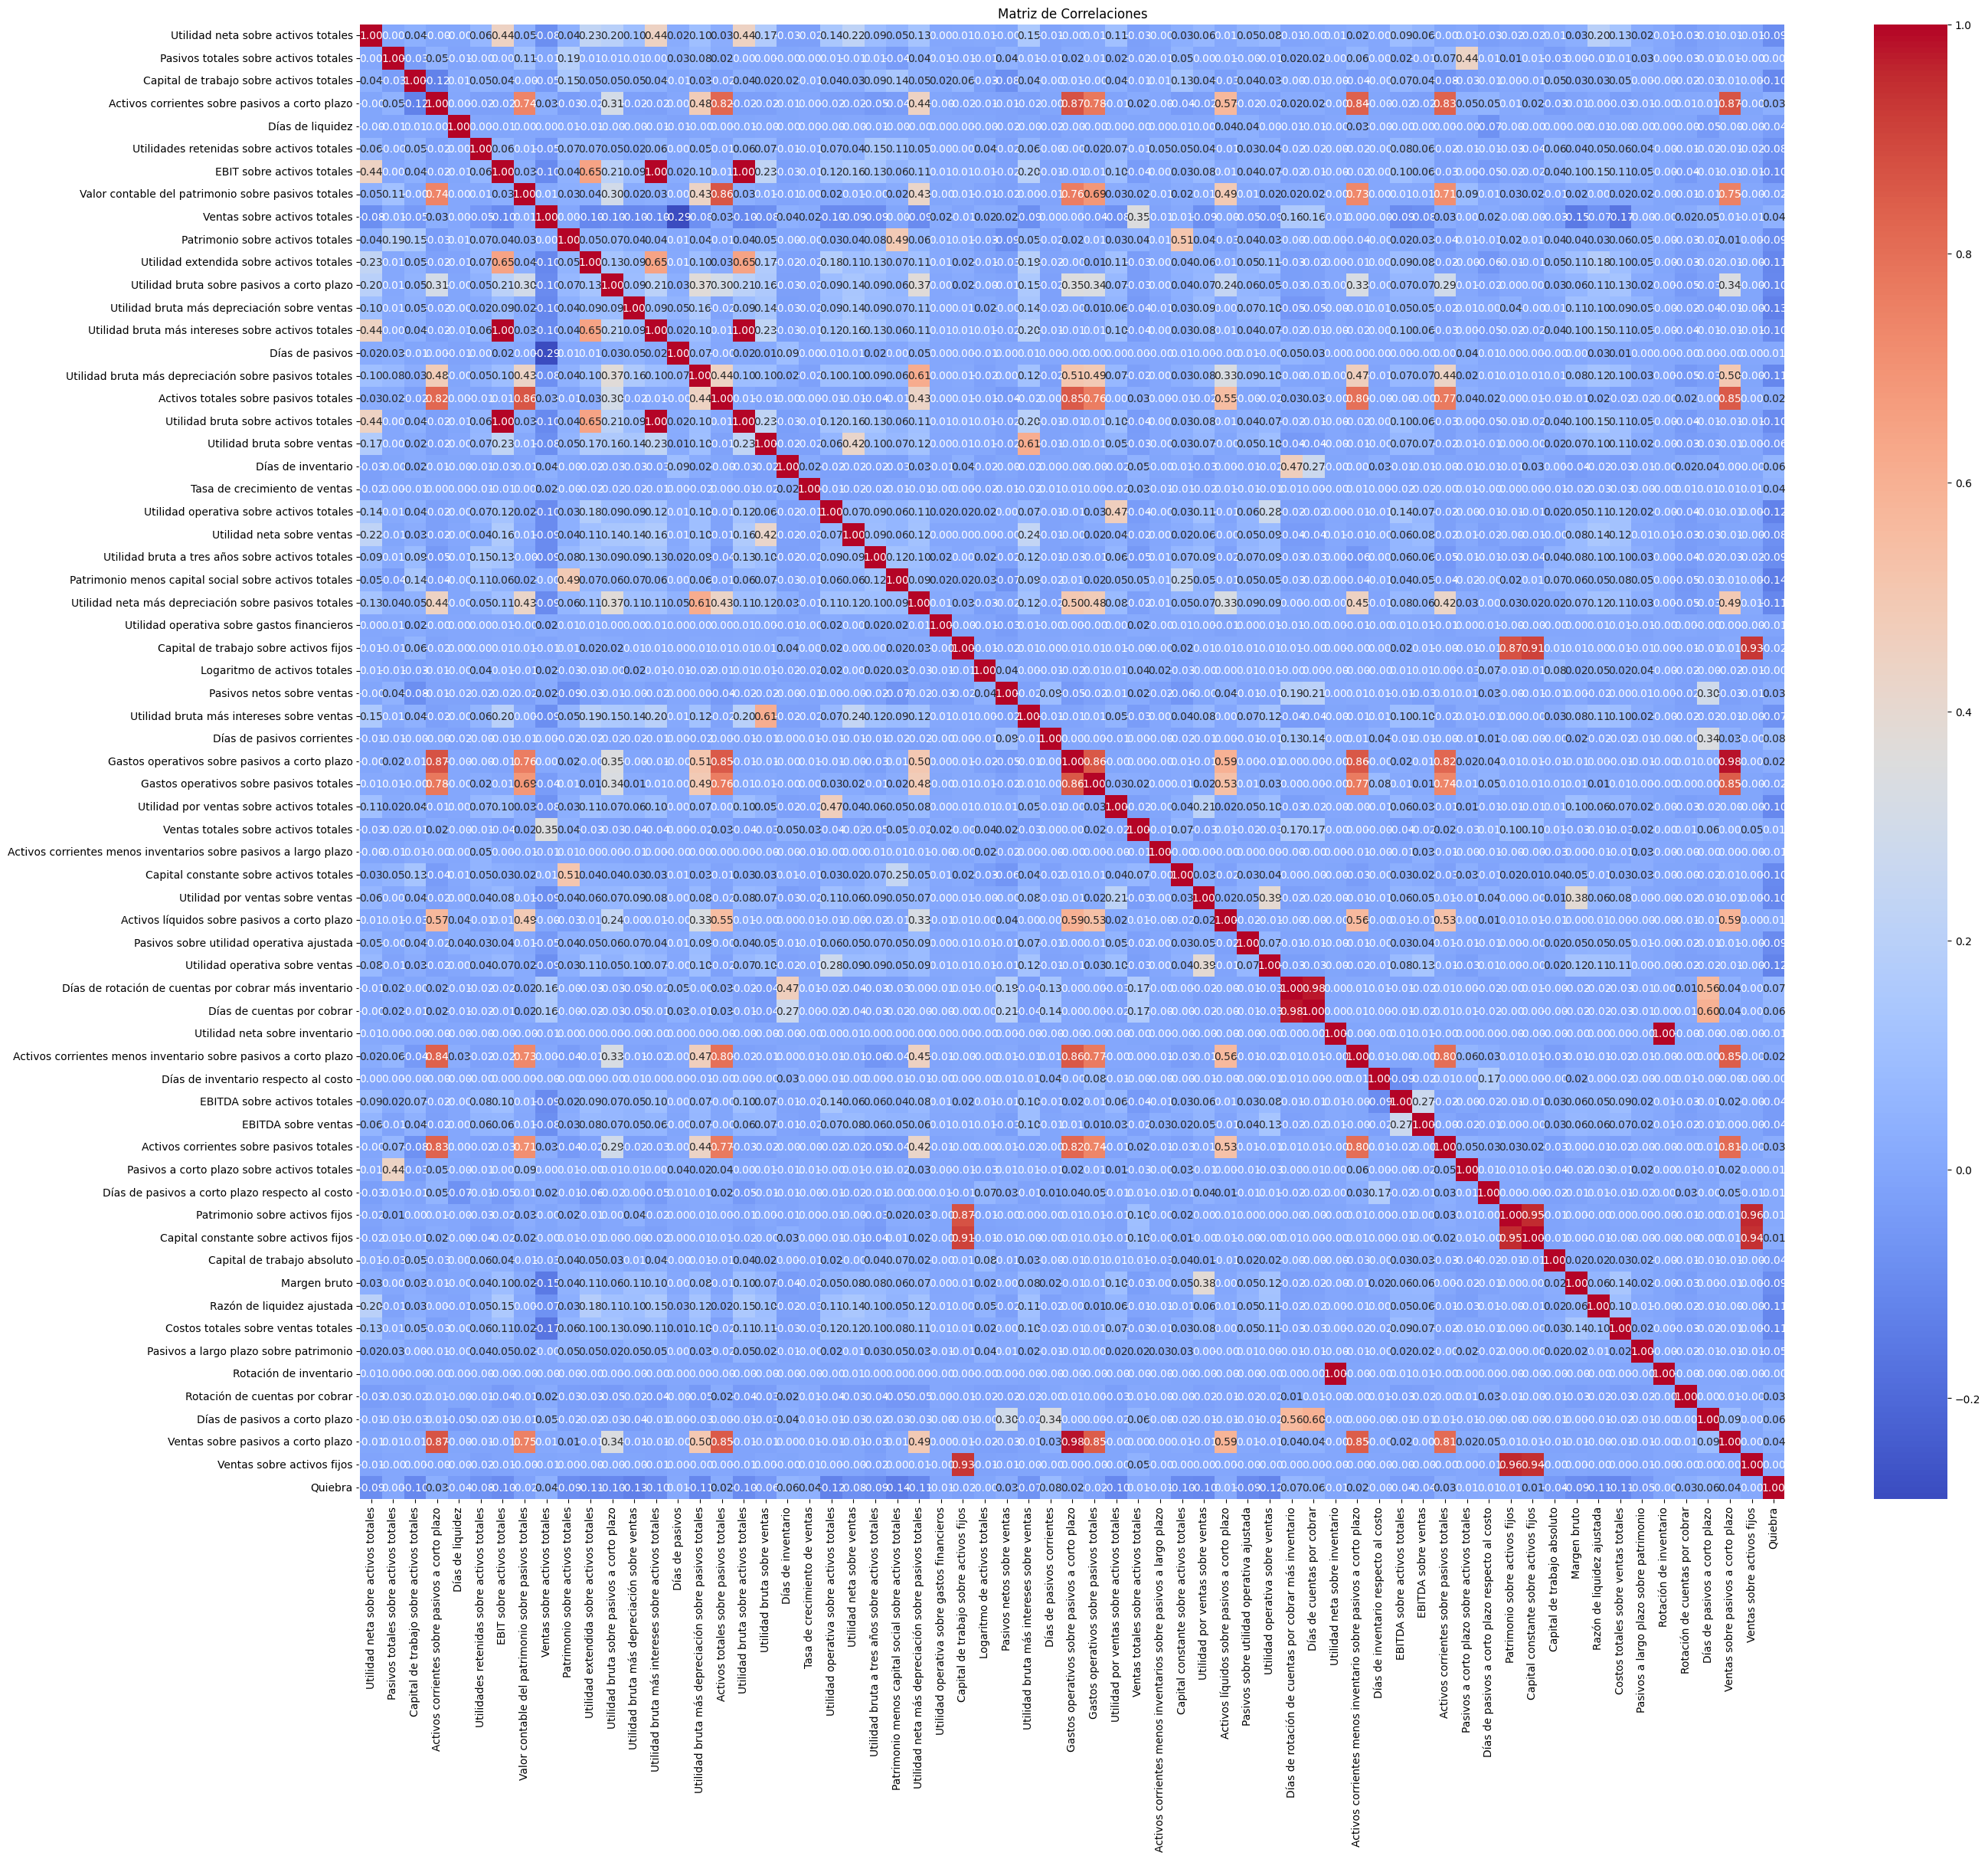

In [ ]:
# Matriz de correlación solo con variables numéricas
dataset_mean_numeric = dataset_mean.select_dtypes(include=[np.number])
plt.figure(figsize=(30, 25))
sns.heatmap(dataset_mean_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlaciones")
plt.show()

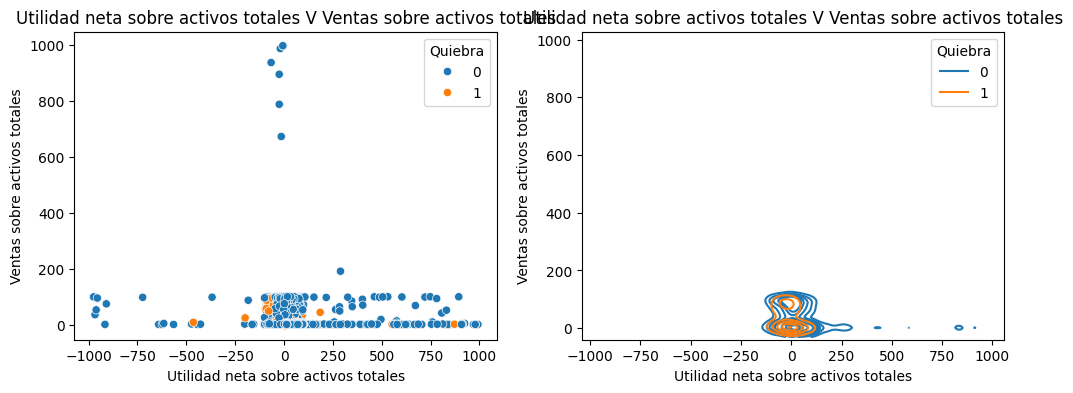

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('Utilidad neta sobre activos totales V Ventas sobre activos totales')
sns.scatterplot(x=dataset_mean_numeric['Utilidad neta sobre activos totales'],y=dataset_mean_numeric['Ventas sobre activos totales'],hue=dataset_mean_numeric['Quiebra']);

plt.subplot(1,2,2)
plt.title('Utilidad neta sobre activos totales V Ventas sobre activos totales')
sns.kdeplot(x=dataset_mean_numeric['Utilidad neta sobre activos totales'],y=dataset_mean_numeric['Ventas sobre activos totales'],hue=dataset_mean_numeric['Quiebra']);

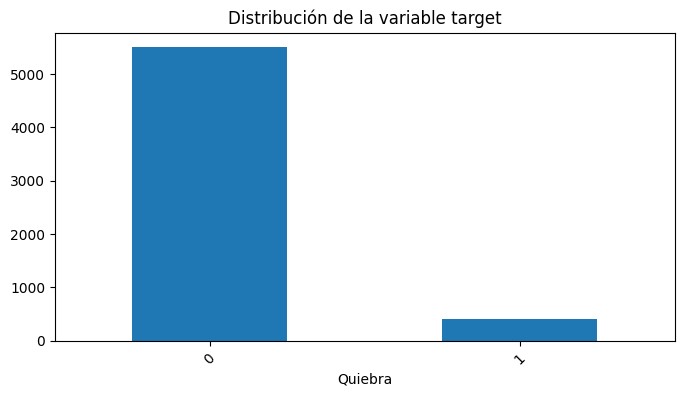

In [ ]:
# Paso 2: Análisis de la distribución de la variable target
plt.figure(figsize=(8, 4))
dataset_mean_numeric["Quiebra"].value_counts().plot(kind="bar", title="Distribución de la variable target")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Paso 3: Identificar si hay desbalance
class_distribution = dataset_mean_numeric["Quiebra"].value_counts()
print("Distribución de clases antes del balanceo:")
print(class_distribution)

Distribución de clases antes del balanceo:
Quiebra
0    5500
1     410
Name: count, dtype: int64


In [ ]:
# Definir variables predictoras y la variable objetivo
X = dataset_mean_numeric.drop(columns=["Quiebra"])
y = dataset_mean_numeric["Quiebra"]

In [ ]:
# Opción 3: Combinación de SMOTE y Tomek links
smote_tomek = SMOTETomek(random_state=42)
X_combined, y_combined = smote_tomek.fit_resample(X, y)
# Usar X_combined e y_combined que son los resultados de fit_resample
data_balanced = pd.DataFrame(X_combined, columns=X.columns)
data_balanced["Quiebra"] = y_combined  # Agregar la variable objetivo balanceada reemplazando la anterior
print("Número de muestras después de SMOTE + Tomek:", len(y_combined))
print("Distribución después de SMOTE + Tomek:")
print(pd.Series(y_combined).value_counts())

Número de muestras después de SMOTE + Tomek: 10836
Distribución después de SMOTE + Tomek:
Quiebra
0    5418
1    5418
Name: count, dtype: int64


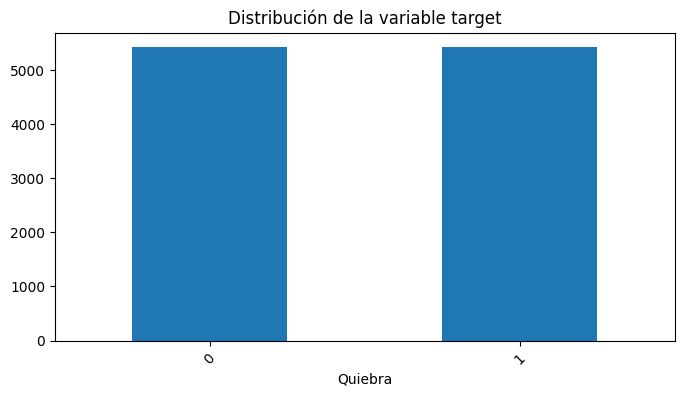

In [ ]:
# Paso 2: Análisis de la distribución de la variable target
plt.figure(figsize=(8, 4))
data_balanced["Quiebra"].value_counts().plot(kind="bar", title="Distribución de la variable target")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Selección de la caracteristica o función objetivo y el resto de los datos
X = data_balanced.drop(['Quiebra'],axis=1)
y = data_balanced['Quiebra']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

In [ ]:
#MODELO LOGISTICREGRESSION
'''Acá se está creando un modelo de regresión logística utilizando LogisticRegression de la biblioteca scikit-learn.
max_iter=1000: Estableces el número máximo de iteraciones para que el modelo pueda converger (es decir, encontrar los mejores coeficientes para los datos). Esto es útil si tienes un conjunto de datos complejo o grandes cantidades de datos.'''
model = LogisticRegression(max_iter=1000)

In [ ]:
model.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
'''Utilizar el modelo entrenado (model) para predecir las etiquetas (Rain_encoded) para el conjunto de datos de prueba (X_test).
Genera un array (y_predict) que contiene las predicciones del modelo (0 o 1), basado en las características presentes en X_test.'''
y_predict = model.predict(X_test)

The accuracy of Logistic Regression is 0.7638


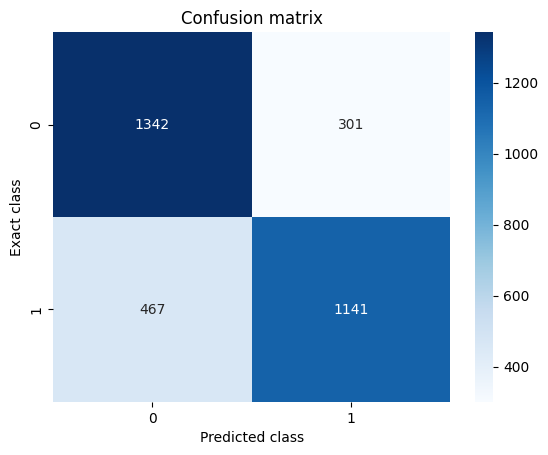

In [ ]:
accuracy = accuracy_score(y_test,y_predict)
print('The accuracy of Logistic Regression is {:.4f}'.format(accuracy))

confus_matrix = confusion_matrix(y_test,y_predict)
plt.title('Confusion matrix')
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class')
plt.ylabel('Exact class');

serie = pd.Series(accuracy,index=['LogisticRegression'])
accuracy_Logmodel = pd.DataFrame({'accuracy':serie})

In [ ]:
# Suponiendo que y_test contiene las etiquetas reales y y_predict las predicciones del modelo
confus_matrix = confusion_matrix(y_test, y_predict)

# Extraer valores de la matriz de confusión
TN, FP, FN, TP = confus_matrix.ravel()

# Calcular métricas derivadas
accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
specificity = TN / (TN + FP)  # Especificidad
f1 = f1_score(y_test, y_predict)

# Imprimir resultados
print(f"🔹 Accuracy: {accuracy:.4f}")
print(f"🔹 Precision (PPV): {precision:.4f}")
print(f"🔹 Recall (Sensibilidad, TPR): {recall:.4f}")
print(f"🔹 Specificity (TNR): {specificity:.4f}")
print(f"🔹 F1-Score: {f1:.4f}")

🔹 Accuracy: 0.7638
🔹 Precision (PPV): 0.7913
🔹 Recall (Sensibilidad, TPR): 0.7096
🔹 Specificity (TNR): 0.8168
🔹 F1-Score: 0.7482
